Операции по банковским картам клиентов

Задачи для анализа

1 Посчитать общее количество транзакций и общую сумму за весь период.

2 Вывести топ-5 городов по сумме транзакций.

3 Определить долю мошеннических операций от общего количества.

4 Построить распределение транзакций по типам оплаты.

5 Рассчитать средний чек (среднюю сумму операции) по категориям магазинов.

6 Построить график активности транзакций по месяцам.

7 Определить клиента с наибольшим общим оборотом.

8 Посмотреть распределение мошеннических операций по категориям.

9 Проанализировать средний чек по способу оплаты.

In [18]:
import pandas as pd
import numpy as np
from faker import Faker
import random

fake = Faker()

# Параметры
n = 1000
clients = [fake.uuid4() for _ in range(100)]
transaction_types = ['покупка', 'перевод', 'пополнение', 'снятие']
merchant_categories = ['еда', 'транспорт', 'аптека', 'онлайн-сервисы', 'одежда', 'развлечения', 'электроника']
cities = ['Москва', 'Санкт-Петербург', 'Казань', 'Новосибирск', 'Екатеринбург']
payment_methods = ['карта', 'NFC', 'онлайн-кошелек']

# Генерация данных
data = []
for _ in range(n):
    data.append({
        'transaction_id': fake.uuid4(),
        'client_id': random.choice(clients),
        'transaction_date': fake.date_time_between(start_date='-1y', end_date='now'),
        'transaction_amount': round(random.uniform(100, 50000), 2),
        'transaction_type': random.choice(transaction_types),
        'merchant_category': random.choice(merchant_categories),
        'is_fraud': random.choices([0, 1], weights=[0.97, 0.03])[0],
        'city': random.choice(cities),
        'payment_method': random.choice(payment_methods)
    })

df = pd.DataFrame(data)
df.to_csv('fintech_transactions.csv', index=False, encoding='utf-8-sig')
print("Датасет успешно создан и сохранён!")


Датасет успешно создан и сохранён!


In [19]:
import matplotlib.pyplot as plt

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      1000 non-null   object        
 1   client_id           1000 non-null   object        
 2   transaction_date    1000 non-null   datetime64[ns]
 3   transaction_amount  1000 non-null   float64       
 4   transaction_type    1000 non-null   object        
 5   merchant_category   1000 non-null   object        
 6   is_fraud            1000 non-null   int64         
 7   city                1000 non-null   object        
 8   payment_method      1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 70.4+ KB


In [21]:
df.describe()

,transaction_date,transaction_amount,is_fraud
count,1000,1000.000000,1000.000000
mean,2024-11-21 07:14:00.372999936,25133.486370,0.031000
min,2024-05-22 21:57:49,105.590000,0.000000
25%,2024-08-20 17:24:54.249999872,12554.465000,0.000000
50%,2024-11-22 14:12:46.500000,24896.365000,0.000000
75%,2025-02-19 22:05:47.249999872,37635.025000,0.000000
max,2025-05-22 17:44:30,49937.850000,1.000000
std,NaN,14422.859214,0.173404


In [22]:
df.head()

,transaction_id,client_id,transaction_date,transaction_amount,transaction_type,merchant_category,is_fraud,city,payment_method
0,4e914e9c-5f61-4602-b320-185c1505cff8,686a1ee1-4c66-455b-8eec-af4b6d662d47,2024-06-28 08:48:35,14917.60,покупка,транспорт,0,Санкт-Петербург,NFC
1,072ccaa4-4219-453f-938a-567fd0ae4ee9,1da169d1-c1cf-413b-a7d8-1cc8d1b1f870,2024-07-05 10:59:29,14169.55,покупка,электроника,0,Москва,NFC
2,c88873e8-8310-48bb-9bb1-130513a8854d,26ac6aae-30d0-490c-9fb0-b80366d4ebb6,2025-01-14 00:42:26,44502.57,покупка,электроника,0,Санкт-Петербург,карта
3,aca0256b-3a7b-414f-920b-1c85436b99a9,6314239f-90c1-490c-980c-741d0c14425e,2025-02-16 06:03:37,17119.73,снятие,еда,0,Екатеринбург,онлайн-кошелек
4,506125df-c767-428f-8111-0964b38e3575,a855e654-3274-4baf-88bc-ed6abc53f8bd,2025-03-16 09:05:26,18631.67,перевод,электроника,0,Москва,онлайн-кошелек


In [23]:
sum_type = df['transaction_type']
print('Количество транзакций:', sum_type.count())

sum_transaction = df['transaction_amount']
print('Общяя сумма транзакций:', sum_transaction.sum())

Количество транзакций: 1000
Общяя сумма транзакций: 25133486.369999997


In [24]:
top_5_city = df['city'].value_counts()
print('Топ 5 городов:', top_5_city.head())

Топ 5 городов: city
Екатеринбург       211
Казань             208
Новосибирск        205
Санкт-Петербург    193
Москва             183
Name: count, dtype: int64


In [25]:
fraud_count = df['is_fraud'].value_counts()
print('Доля мошеннических транзакций: ', fraud_count)

Доля мошеннических транзакций:  is_fraud
0    969
1     31
Name: count, dtype: int64


In [26]:
type_count = df['payment_method'].value_counts()
print('Распределение транзакций: ', type_count)

Распределение транзакций:  payment_method
NFC               352
онлайн-кошелек    329
карта             319
Name: count, dtype: int64


In [27]:
avg_chek = df.groupby('merchant_category')['transaction_amount'].mean()
print(avg_chek)

merchant_category
аптека            26457.395581
еда               25334.047192
одежда            25018.657707
онлайн-сервисы    24402.906029
развлечения       24574.381866
транспорт         25040.430974
электроника       25179.121042
Name: transaction_amount, dtype: float64


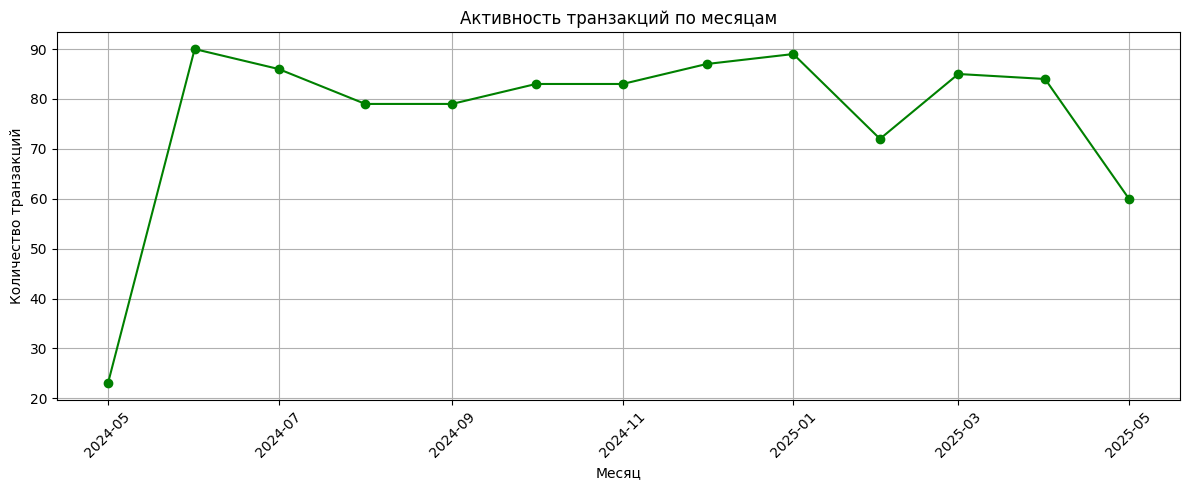

In [28]:
df['month'] = df['transaction_date'].dt.to_period('M').dt.to_timestamp()
monthly_activity = df.groupby('month')['transaction_id'].count()

plt.figure(figsize=(12, 5))
plt.plot(monthly_activity.index, monthly_activity.values, marker='o', color='green')
plt.title('Активность транзакций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
client_amount_max = df.groupby('client_id')['transaction_amount'].sum()
top_client = client_amount_max.sort_values(ascending=False).head(1)
print(top_client)

client_id
4d507799-8505-4305-8c6b-d2de425e2e43    507794.67
Name: transaction_amount, dtype: float64


In [30]:
#8 Посмотреть распределение мошеннических операций по категориям.

aud_count_category = df.groupby('is_fraud')['payment_method'].value_counts()
print(aud_count_category)

is_fraud  payment_method
0         NFC               340
          онлайн-кошелек    317
          карта             312
1         NFC                12
          онлайн-кошелек     12
          карта               7
Name: count, dtype: int64


In [31]:
avg_chek_payment = df.groupby('payment_method')['transaction_amount'].mean()
print(avg_chek_payment)

payment_method
NFC               25075.700568
карта             25165.704357
онлайн-кошелек    25164.073191
Name: transaction_amount, dtype: float64


In [32]:
df.to_csv('transactions_cleaned.csv', index=False)

In [33]:
# Фильтруем нужные столбцы
df_fact = df[[
    'transaction_id', 'client_id', 'transaction_date', 'transaction_amount',
    'transaction_type', 'merchant_category', 'is_fraud',
    'city', 'payment_method'
]]

df_fact = df_fact.tail(200)
df_fact

,transaction_id,client_id,transaction_date,transaction_amount,transaction_type,merchant_category,is_fraud,city,payment_method
800,3ce8668c-7c71-4024-a7fc-05993ccccfb4,3be17eac-d496-442a-90ce-3a43548d1ef6,2025-02-19 10:41:29,27236.42,пополнение,электроника,0,Казань,онлайн-кошелек
801,6cc3f97e-3477-4707-adbc-af39e629f7cd,848b139b-d094-4812-ba9e-4f472ff74137,2024-07-31 02:17:54,22871.41,снятие,онлайн-сервисы,0,Санкт-Петербург,NFC
802,3d999510-6726-4a4e-bc84-caf44afc0299,2e591af4-7e8f-4605-80a7-47f2df8f058d,2024-10-12 06:49:20,42227.02,снятие,аптека,0,Новосибирск,онлайн-кошелек
803,3b91a161-6bfe-46c9-9e7b-6c1f1d40d405,2361038c-4d06-4f82-9823-f98cde9a3ebb,2024-10-04 15:15:33,46028.99,перевод,одежда,0,Казань,онлайн-кошелек
804,557be01c-db59-4c97-82c3-4924378c9e3e,598c7722-7086-46c4-9f19-9d94c304b747,2024-12-15 17:34:24,25082.20,перевод,электроника,0,Новосибирск,карта
...,...,...,...,...,...,...,...,...,...
995,31650780-60e4-4e6b-b1a9-0ae4e6c4643e,9e9c39e4-0490-4879-86f8-8e323a69972e,2025-04-26 04:09:16,34093.74,снятие,одежда,0,Екатеринбург,карта
996,72d0d940-c124-436b-b94d-e41fbaad0450,9e9c39e4-0490-4879-86f8-8e323a69972e,2024-07-19 05:52:15,40607.92,перевод,аптека,0,Санкт-Петербург,онлайн-кошелек
997,114ae621-c2d1-4bac-9672-76d51e8c123c,8ddf3324-bfa3-4371-9fe6-fc5021d7ff9e,2024-12-27 14:49:33,25795.65,покупка,развлечения,0,Новосибирск,онлайн-кошелек
998,b5eb94be-43f1-4aec-bcf3-876a4b85c3f3,2361038c-4d06-4f82-9823-f98cde9a3ebb,2025-05-11 21:37:40,23816.62,снятие,одежда,0,Москва,онлайн-кошелек


In [34]:
avg_by_category = df.groupby('merchant_category')['transaction_amount'].mean().reset_index()
avg_by_category.columns = ['merchant_category', 'avg_transaction_amount']

avg_by_category

,merchant_category,avg_transaction_amount
0,аптека,26457.395581
1,еда,25334.047192
2,одежда,25018.657707
3,онлайн-сервисы,24402.906029
4,развлечения,24574.381866
5,транспорт,25040.430974
6,электроника,25179.121042


In [35]:
fraud_by_method = df.groupby(['is_fraud', 'payment_method']).size().reset_index(name='count')

fraud_by_method

,is_fraud,payment_method,count
0,0,NFC,340
1,0,карта,312
2,0,онлайн-кошелек,317
3,1,NFC,12
4,1,карта,7
5,1,онлайн-кошелек,12


In [36]:
df['month'] = df['transaction_date'].dt.to_period('M').astype(str)
monthly_summary = df.groupby('month')['transaction_amount'].sum().reset_index()

monthly_summary

,month,transaction_amount
0,2024-05,602031.27
1,2024-06,2231236.07
2,2024-07,1980317.58
3,2024-08,1890836.39
4,2024-09,2098698.85
5,2024-10,2090537.57
6,2024-11,2008681.26
7,2024-12,2057832.35
8,2025-01,2152188.05
9,2025-02,1983922.96


In [37]:
client_turnover = df.groupby('client_id')['transaction_amount'].sum().reset_index()
client_turnover.columns = ['client_id', 'total_turnover']

client_turnover

,client_id,total_turnover
0,0500dbc1-b6ab-43b6-adfe-2dc2d92d6023,105002.39
1,0604b3d9-f965-4b4b-9a58-bb4bdcca6340,148265.61
2,0835e88f-b2f0-41e8-8d1c-1cfa40870c31,277679.09
3,098a4f03-7d1b-4876-a7f0-89f3f6b6c4ca,255504.80
4,0dc5b7f9-5671-4381-b76a-44d760c0c662,237997.09
...,...,...
95,ee7a1cc7-10bb-49ef-a7f2-6342d6ad627e,305138.79
96,f2373097-50eb-485a-b3f4-9df2eec3fb7b,337647.22
97,f85954fb-18c1-4238-940c-9bb8171796cf,151921.72
98,fdc90d49-f042-48c7-ba3a-268f831ecff0,148769.98


In [ ]:
df['month'] = df['transaction_date'].dt.to_period('M').dt.to_timestamp()
monthly_activity = df.groupby('month')['transaction_id'].count()

monthly_summary_df = pd.read_csv('columns/monthly_summary.csv')

monthly_summary_df['month'] = pd.to_datetime(monthly_summary_df['month'])

monthly_activity_df = monthly_activity.reset_index()
monthly_activity_df.columns = ['month', 'activity']

merged_df = monthly_summary_df.merge(monthly_activity_df, on='month', how='left')

print(merged_df.head())

merged_df.to_csv('monthly_summary_with_activity.csv', index=False)


       month  transaction_amount  activity
0 2024-05-01          1966091.05        23
1 2024-06-01          2281937.21        90
2 2024-07-01          2338511.48        86
3 2024-08-01          1942363.60        79
4 2024-09-01          2136630.21        79
